<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/Mall_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Loading The Data**

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Mall_Customers.csv"

Mall_c = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path)

<ipython-input-2-3ce592fc84cd>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  Mall_c = kagglehub.load_dataset(


In [ ]:
Mall_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
Mall_c.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
x_m = Mall_c[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
x_scaled_m = scaler.fit_transform(x_m)

In [ ]:
pca = PCA()
x_pca_m = pca.fit_transform(x_scaled_m)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca.fit_transform(x_scaled_m)

the minimum number of components preserving 90–95% variance: 2


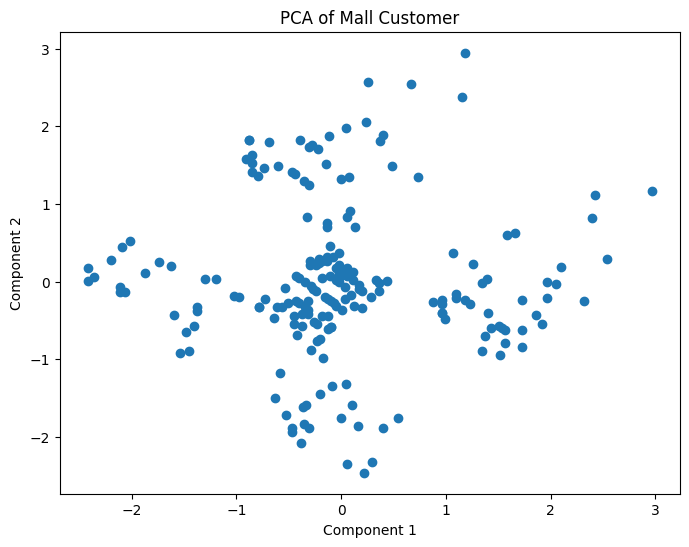

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca_m[:, 0], x_pca_m[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of Mall Customer')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
Mall_c['cluster'] = kmeans.fit_predict(x_pca_reduced)
#t-SNE before clustering
tsne = TSNE(n_components=2, random_state=42)
x_tsne_before = tsne.fit_transform(x_scaled_m)

#t-SNE after clustering
x_tsne_after = tsne.fit_transform(x_pca_reduced)

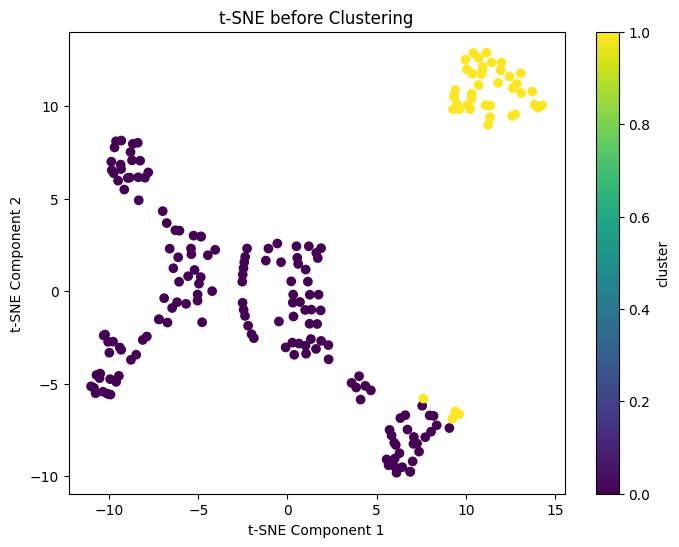

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_before[:, 0], x_tsne_before[:, 1], c=Mall_c['cluster'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE before Clustering')
plt.colorbar(label='cluster')
plt.show()

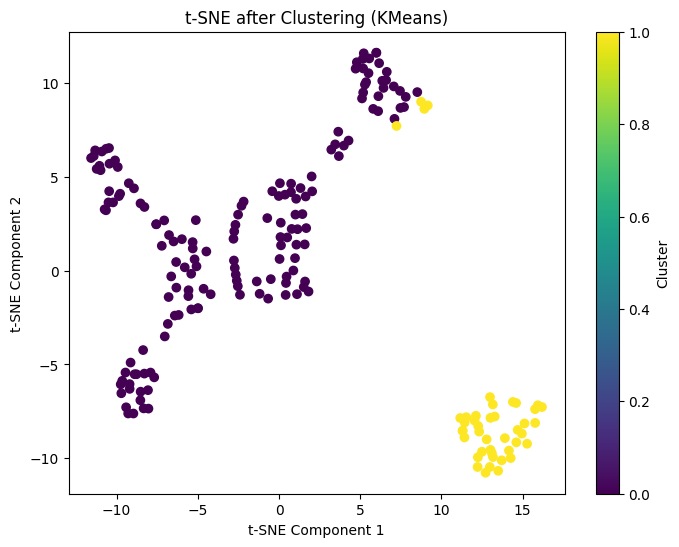

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_after[:, 0], x_tsne_after[:, 1], c=Mall_c['cluster'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE after Clustering (KMeans)')
plt.colorbar(label='Cluster')
plt.show()